# Perceptron implementation:


## Importing panda and numpy:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

## Importing the dataset and converting as panda framework:

In [2]:
def import_data (filename):
    """
    This function, imports the train/test data and create the attribute matrix and labels using the input data
    """
    Matrix = []
    Label = []
    with open(filename) as f:

        for line in f:
            sample = line.split()
            Label.append(float(sample[0]))
            sample.pop(0)
            row = []
            for s in sample:
                feature, value = s.split(':')
                z = len(row)
                nz = int(feature) - (z+1)
                for i in range (nz):
                    row.append(0)
                row.append(float(value))
            Matrix.append(row)
    data =[]
    M = max(len(row) for row in Matrix)
    #print("M:",M)
    for row in Matrix:
        nz = M - (len(row))
        for i in range (nz):
            row.append(0)
        data.append(row)
    Label1 = np.array(Label)
    data1= np.array(data)
    #print("aaa:",Label1, data1.shape)
    S1 = np.concatenate((data1, Label1[:,None]),axis=1)
    attributes = np.arange(1, np.size(data1,1)+2)
    #print(attributes)
    samples = range(0,np.size(data1,0))
    data2 = pd.DataFrame(S1, columns=attributes, index=samples)
    #print('label',data2[6])

    return data2
    #print("data1:",data1.shape)

In [3]:
def update_label(D):
    x,y = D.shape
    for i in range(x):
        if D[y][i] ==0.0:
            D[y][i] = -1.0
    return (D)
def k_fold(D,k):
    cols = D.columns
    D = D.to_numpy()
    r_n, _ = D.shape
    k_n = (r_n//5)
    lb = (k-1)*k_n
    if k == 5:
        ub = r_n
    else:
        ub = k*k_n-1
    
    fk = D [lb:ub, :] 
    
    Fk = pd.DataFrame(fk, columns=cols)
    return Fk

def import_label (D, new_feature):
    D = D.to_numpy()
    D = D.copy()
    new_feature = new_feature.to_numpy()
    labels = D[:, -1]
    labels = labels[:,None]

    D_out = np.append(new_feature, labels, axis=1)
    
    attributes = np.arange(1, np.size(D_out,1)+1)
    D_out = pd.DataFrame(D_out, columns=attributes)
    return D_out

def concat_datasets (D1, D2):
    if type(D1) != np.ndarray:
        D1 = D1.to_numpy()
    if type(D2) != np.ndarray:
        D2 = D2.to_numpy()
    D1 = D1.copy()
    D_out = np.append(D1[:,:-1], D2, axis=1)
    
    attributes = np.arange(1, np.size(D_out,1)+1)
    D_out = pd.DataFrame(D_out, columns=attributes)
    return D_out

### Importing the glove datasets:

In [4]:
Train_data1 = import_data('glove.train.libsvm')
Train_data_glove = update_label(Train_data1)
Test_data1 = import_data('glove.test.libsvm')
Test_data_glove = update_label(Test_data1)
Eval_data_glove = import_data('glove.eval.anon.libsvm')

### Importing the bag of words datasets:

In [5]:
Train_data1 = import_data('bow.train.libsvm')
Train_data_bow = update_label(Train_data1)
Test_data1 = import_data('bow.test.libsvm')
Test_data_bow = update_label(Test_data1)
Eval_data_bow = import_data('bow.eval.anon.libsvm')

### Importing the tfidf datasets:

In [6]:
Train_data1 = import_data('tfidf.train.libsvm')
Train_data_tfidf = update_label(Train_data1)
Test_data1 = import_data('tfidf.test.libsvm')
Test_data_tfidf = update_label(Test_data1)
Eval_data_tfidf = import_data('tfidf.eval.anon.libsvm')

### Importing the miscellaneous datasets:

In [7]:
misc_train = pd.read_csv ('misc-attributes-train.csv')
train_samples, _ = misc_train.shape
misc_test = pd.read_csv ('misc-attributes-test.csv')
test_samples, _ = misc_test.shape
misc_eval = pd.read_csv ('misc-attributes-eval.csv')
eval_samples, _ = misc_eval.shape

## In order to convert the database to one hot encoding, all the dataset are concatenated and converted to correlate the cominations.

In [8]:
database = pd.concat([misc_train, misc_test, misc_eval], axis=0)
database.head()

,defendant_age,defendant_gender,num_victims,victim_genders,offence_category,offence_subcategory
0,62,female,1,male,theft,theftFromPlace
1,17,male,1,male,theft,pocketpicking
2,not known,male,1,male,theft,pocketpicking
3,not known,male,1,male,theft,simpleLarceny
4,52,male,1,female,theft,pocketpicking


In [10]:
database.dtypes

defendant_age          object
defendant_gender       object
num_victims             int64
victim_genders         object
offence_category       object
offence_subcategory    object
dtype: object

In [9]:
database[database.isnull().any(axis=1)]
# Converting "NaN" to no_gender in victom_genders category:
database = database.fillna({"victim_genders": "no_gender"})
database.head()

# convert all string data in defendant such as not known ,... to Nan and then substitute nan with 0;
database['defendant_age'] = pd.to_numeric(database.defendant_age, errors='coerce')
database = database.fillna({"defendant_age": 0})
database

,defendant_age,defendant_gender,num_victims,victim_genders,offence_category,offence_subcategory
0,62.0,female,1,male,theft,theftFromPlace
1,17.0,male,1,male,theft,pocketpicking
2,0.0,male,1,male,theft,pocketpicking
3,0.0,male,1,male,theft,simpleLarceny
4,52.0,male,1,female,theft,pocketpicking
...,...,...,...,...,...,...
5245,0.0,male,1,male,theft,theftFromPlace
5246,0.0,male,0,no_gender,sexual,sodomy
5247,0.0,male,1,male,theft,stealingFromMaster
5248,26.0,male,1,male,theft,burglary


In [10]:
# Now that all the data are free of Nan we can convert them to one-hot encoding.
misc_transfered = pd.concat([database.defendant_age, database.num_victims, pd.get_dummies(database.defendant_gender), pd.get_dummies(database.victim_genders), pd.get_dummies(database.offence_category), pd.get_dummies(database.offence_subcategory)], axis=1)
# for dicision tree i convert all of the featres to one-hot encoding
misc_transfered_all_bin = pd.concat([pd.get_dummies(database.defendant_age), pd.get_dummies(database.num_victims), pd.get_dummies(database.defendant_gender), pd.get_dummies(database.victim_genders), pd.get_dummies(database.offence_category), pd.get_dummies(database.offence_subcategory)], axis=1)

In [13]:
misc_transfered

,defendant_age,num_victims,female,indeterminate,male,female,female;female,female;female;female,female;female;female;female,female;female;female;female;female,...,shoplifting,simpleLarceny,sodomy,stealingFromMaster,taxOffences,theftFromPlace,threateningBehaviour,treason,vagabond,wounding
0,62.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,17.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,52.0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5246,0.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5247,0.0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5248,26.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Train_misc_transfered = misc_transfered.iloc[:train_samples,:] 
Test_misc_transfered = misc_transfered.iloc[train_samples:train_samples+test_samples,:]
Eval_misc_transfered = misc_transfered.iloc[train_samples+test_samples:,:] 
Train_misc = import_label(Train_data_glove, Train_misc_transfered)
Test_misc = import_label(Test_data_glove, Test_misc_transfered)
Eval_misc = import_label(Eval_data_glove, Eval_misc_transfered)
print(Train_misc.shape)

(17500, 140)


In [12]:
def cross_val_ev(f1, f2, f3, f4, f5, max_epoch, learning_rate, perceptron_fcn, margin_variable = 0):
    """
    The function calculates the mean accuracy and std based on the 5-fold cross validation
    """

    #train_data = pd.DataFrame(columns = f1.columns)
    dataset = []
    acc = []
   
    for i in range (1,6):
        valid_data = eval("f"+str(i))
        train_name =[]
        val_name = ["f"+str(i)]
        #print(i,val_name)
        #print(valid_data)
        for j in range(1,6):
            if j != i:
                #print(j)
                train_name.append ("f"+str(j))
                dataset.append(eval("f"+str(j)))
        train_data = pd.concat(dataset, ignore_index=True)
        dataset = []
        #print(train_data.shape)
        #print(train_data)
        if perceptron_fcn == 'simple_perceptron':
            w, b, _ = perceptron(train_data, max_epoch, learning_rate)
        elif perceptron_fcn == 'decaying_perceptron':
            w, b, _ = perceptron_decay(train_data, max_epoch, learning_rate)
        elif perceptron_fcn == 'average_perceptron':
            w, b, _ = avg_perceptron(train_data, max_epoch, learning_rate)
        elif perceptron_fcn == 'margin_perceptron':
            w, b, _ = margin_perceptron(train_data, max_epoch, learning_rate, margin_variable)
            
        w = w[-1]
        #print(w)
        b = b [-1]
        
        #print(train_name)
        acc.append (accuracy (valid_data, w,b))
    #print("accuracy:", acc)
    Std = np.std(acc)
    Mean = np.mean(acc)
    
    return Mean, Std



In [13]:
def accuracy (D, w, b):
    """
        This function returns the accuracy of the dataset based on set D and weight and bias. 
    """
    D = D.to_numpy()
    n_correct_prediction = 0
    n_samples = np.size(D,0)
    label_ix = np.size(D,1)
    for i in range(n_samples):
        sample = D[i,:]
        true_label = sample[-1]
        xi = sample[:-1]
        predicted_label = np.sign (np.dot(xi,w) + b)
        if predicted_label == true_label:
            n_correct_prediction += 1
    acc = n_correct_prediction/n_samples * 100
    return acc
        

In [14]:
def prediction (D, w, b):
    """
        This function returns the prediction of the dataset based on set D and weight and bias. 
    """
    D = D.to_numpy()
    n_samples = np.size(D,0)
    label_ix = np.size(D,1)
    pred = []
    for i in range(n_samples):
        sample = D[i,:]
        xi = sample[:-1]
        predicted_label = np.sign (np.dot(xi,w) + b)
        #print(predicted_label[0])
        if predicted_label == -1.0:
            predicted_label = [0.0]
        pred.append([i, predicted_label[0]])
        
    Pred = pd.DataFrame(pred, columns=['example_id', 'label'])

    return Pred


### Importing the folded datasets:

## Baseline:

In [153]:

def frequent_label(D):
    """
    Create common label for set S:
    """
    label_ix = np.size(D,1)
    label = np.unique(D[label_ix])[np.argmax(np.unique(D[label_ix],return_counts=True)[1])]
    
    return label



def baseline_accuracy (D, predicted_label):
    """
        This function returns the baseline accuracy of the dataset for baseline. 
    """
    D = D.to_numpy()
    n_correct_prediction = 0
    n_samples = np.size(D,0)
    label_ix = np.size(D,1)
    for i in range(n_samples):
        sample = D[i,:]
        true_label = sample[-1]
        xi = sample[:-1]
        if predicted_label == true_label:
            n_correct_prediction += 1
    acc = n_correct_prediction/n_samples * 100
    return acc
predicted_label = frequent_label(Train_data)

Train_acc = baseline_accuracy (Train_data, predicted_label)
Test_acc = baseline_accuracy (Test_data, predicted_label)


report1 = [{'predicted label':predicted_label, 'Train accuracy(%)':Train_acc, 
            'Test accuracy(%)':Test_acc}]

report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))




 predicted label  Train accuracy(%)  Test accuracy(%)
            -1.0          50.342857         48.844444


## Margin Perceptron:

In [15]:
def margin_perceptron (D, max_epoch, learning_rate, margin_variable):
    D = D.to_numpy()
    #lr = learning_rate
    u = margin_variable
    
     
    w_size = np.size(D,1)-1
    w = -.01 + 0.02 * np.random.rand(w_size)
    ba = 0 
    b = -.01 + 0.02 * np.random.rand(1)
    a = 0
    update = 0
    ep_a = []
    ep_ba = []
    ep_update = []
    #ep_w = []
    #ep_b = []
    #ep_update = []
    for epoch in range(1, max_epoch+1):
        lr = learning_rate/epoch 
        #1.shuffle the data
        up = 0
        
        np.random.shuffle(D)
        #2.Update weights:
        for i in range (np.size(D,0)):
            xi = D[i,:-1]
            yi = D[i,-1]
            if yi * (np.dot(xi, w) + b) < u:
                update += 1
                w += lr * yi * xi
                b += lr * yi
            a += w
            ba += b
        
        #update.append(up)
        #print("w0:", w[0])
        a1 = a
        ba1 = ba
        update1 = update
        
        #w1 = w
        #b1 = b
        #update1 = update
        #print(b)
        #print(b1)
        ep_a.append(a1.copy())
        ep_ba.append(ba1.copy())
        ep_update.append(update1)
        #print('ep_b:',ep_b)
    #print('update:', update)
    ep_a = np.array(ep_a)
    ep_ba = np.array(ep_ba)
    ep_update = np.array(ep_update)
    return ep_a, ep_ba, ep_update

## Margin Perceptron over gloves:

In [22]:
Data1_gloves = Train_data_glove
cols = Data1_gloves.columns
Data1_gloves = Data1_gloves.to_numpy()
np.random.shuffle(Data1_gloves)
Data1_gloves = pd.DataFrame(Data1_gloves, columns=cols)

f1_gloves = k_fold(Data1_gloves,1)
f2_gloves = k_fold(Data1_gloves,2)
f3_gloves = k_fold(Data1_gloves,3)
f4_gloves = k_fold(Data1_gloves,4)
f5_gloves = k_fold(Data1_gloves,5)

In [23]:
# Evaluating the network accuracy based on different values for learning rates and u:
"""
The cross validation function in previous section is run for different values of learning rates to find the best
hyper parameter
"""
Learning_rates = [ 0.01, 0.05, 0.001, 0.0001]
margin_variable = [0.2,0.1]

max_epoch = 10
acc_mean = []
acc_std = []
result = []
for lr in Learning_rates:
    for u in margin_variable:
        mean, std = cross_val_ev(f1_gloves, f2_gloves, f3_gloves, f4_gloves, f5_gloves, max_epoch, lr, 'margin_perceptron', u)
        acc_mean.append(mean)
        acc_std.append(std)
        result.append([lr, u, mean, std])
        #print(lr, u)

result = np.array(result)
Best_lr = result[np.argmax(result[:,2]), 0]
Best_u = result[np.argmax(result[:,2]), 1]
best_acc = result[np.argmax(result[:,2]), 2]

print('Cross validation results for different Learning rates and margin variables:')
result = pd.DataFrame(result, columns=['Learning rate', 'Margin variable', 'accuracy mean', 'accuracy std'])

pd.set_option('display.max_rows', None)
print(result.to_string(index = False))
print('Best learning rate:', Best_lr)

print('Best margin variable:', Best_u)

report1 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best accuracy':best_acc}]
report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))


Cross validation results for different Learning rates and margin variables:
 Learning rate  Margin variable  accuracy mean  accuracy std
        0.0100              0.2      64.466207      0.461541
        0.0100              0.1      64.626233      0.317833
        0.0500              0.2      64.123265      0.376297
        0.0500              0.1      64.340476      0.635709
        0.0010              0.2      64.414794      0.673248
        0.0010              0.1      64.557679      0.594159
        0.0001              0.2      63.660283      0.600437
        0.0001              0.1      64.026148      0.865146
Best learning rate: 0.01
Best margin variable: 0.1
 Best learning rate  Best margin variable  Best accuracy
               0.01                   0.1      64.626233


In [24]:

max_epoch = 100
w4, b4, ep_update4  = margin_perceptron(Train_data_glove, max_epoch, Best_lr, Best_u)
#print(b)
train_acc = []
train_acc1 =[]
acc = [ 0, 0, 0]
for i in range (max_epoch):
    #print(w[i][0])
    train_acc.append (accuracy (Train_data_glove, w4[i][:],b4[i]))
    acc[0] = i+1
    acc[1] = accuracy (Train_data_glove, w4[i][:],b4[i])
    acc[2] = ep_update4[i]
    train_acc1.append(acc.copy())
    
#print(train_acc)

train_acc = np.array(train_acc)

best_epoch = np.argmax(train_acc)+1


test_acc =  accuracy (Test_data_glove, w4[best_epoch-1][:],b4[best_epoch-1])


 Epoch  Train accuracry  number of updates
     1        65.468571               8053
     2        65.942857              15771
     3        66.068571              23663
     4        66.005714              31663
     5        66.160000              39889
     6        66.360000              48396
     7        66.491429              57113
     8        66.571429              65876
     9        66.611429              74773
    10        66.760000              83908
    11        66.737143              93210
    12        66.760000             102624
    13        66.725714             112250
    14        66.737143             121885
    15        66.731429             131677
    16        66.714286             141466
    17        66.731429             151545
    18        66.754286             161593
    19        66.731429             171591
    20        66.760000             181842
    21        66.800000             192122
    22        66.794286             202483
    23     

Text(0, 0.5, 'Training accuracy')

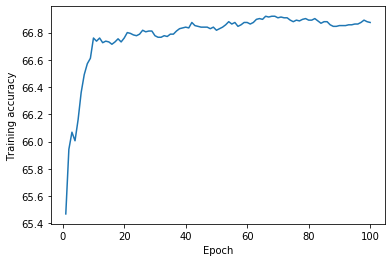

In [25]:
Epoch = np.arange(1,max_epoch+1)
data2 = pd.DataFrame(train_acc1, columns=['Epoch','Train accuracry', 'number of updates'])
print(data2.to_string(index = False))
train_acc1 = np.array(train_acc1)
plt.plot(train_acc1[:,0], train_acc1[:,1])
plt.xlabel('Epoch') 
plt.ylabel('Training accuracy')

In [26]:
report4 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best cross val. acc.(%)':best_acc, 
            'Best epoch':best_epoch, 'number of updates':train_acc1[best_epoch-1][2],
            'Train accuracy(%)':train_acc1[best_epoch-1][1], 
            'Test accuracy(%)':test_acc}]

report4 = pd.DataFrame.from_records(report4)
print(report4.to_string(index = False))

 Best learning rate  Best margin variable  Best cross val. acc.(%)  Best epoch  number of updates  Train accuracy(%)  Test accuracy(%)
               0.01                   0.1                64.626233          66           698221.0              66.92         65.111111


In [27]:
pred4 = prediction (Eval_data_glove,  w4[best_epoch-1][:], b4[best_epoch-1])
pred4.to_csv ('results\Preceptron_result\gloves_labels.csv', index = False, header=True)

## Margin perceptron with miscalleneous:

In [29]:
# generating 5-fold dataset:
Data1 = Train_misc
cols = Data1.columns
Data1 = Data1.to_numpy()
np.random.shuffle(Data1)
Data1 = pd.DataFrame(Data1, columns=cols)
f1_misc = k_fold(Data1,1)
f2_misc = k_fold(Data1,2)
f3_misc = k_fold(Data1,3)
f4_misc = k_fold(Data1,4)
f5_misc = k_fold(Data1,5)

In [30]:
# Evaluating the network accuracy based on different values for learning rates and u:
"""
The cross validation function in previous section is run for different values of learning rates to find the best
hyper parameter
"""
Learning_rates = [1,0.1, 0.01, 0.001]
margin_variable = [1,0.1, 0.01]

max_epoch = 10
acc_mean = []
acc_std = []
result = []
for lr in Learning_rates:
    for u in margin_variable:
        mean, std = cross_val_ev(f1_misc, f2_misc, f3_misc, f4_misc, f5_misc, max_epoch, lr, 'margin_perceptron', u)
        acc_mean.append(mean)
        acc_std.append(std)
        result.append([lr, u, mean, std])
        #print(lr, u)

result = np.array(result)
Best_lr = result[np.argmax(result[:,2]), 0]
Best_u = result[np.argmax(result[:,2]), 1]
best_acc = result[np.argmax(result[:,2]), 2]

print('Cross validation results for different Learning rates and margin variables:')
result = pd.DataFrame(result, columns=['Learning rate', 'Margin variable', 'accuracy mean', 'accuracy std'])

pd.set_option('display.max_rows', None)
print(result.to_string(index = False))
print('Best learning rate:', Best_lr)

print('Best margin variable:', Best_u)

report1 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best accuracy':best_acc}]
report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))


Cross validation results for different Learning rates and margin variables:
 Learning rate  Margin variable  accuracy mean  accuracy std
         1.000             1.00      78.275050      0.762655
         1.000             0.10      77.612048      0.553744
         1.000             0.01      77.749230      0.703646
         0.100             1.00      78.469388      0.785687
         0.100             0.10      78.200745      0.618433
         0.100             0.01      77.766353      0.715318
         0.010             1.00      78.183590      0.680370
         0.010             0.10      78.457963      0.818276
         0.010             0.01      78.183595      0.631128
         0.001             1.00      77.977837      0.642310
         0.001             0.10      78.177873      0.671491
         0.001             0.01      78.446519      0.728204
Best learning rate: 0.1
Best margin variable: 1.0
 Best learning rate  Best margin variable  Best accuracy
                0.1     

In [36]:

max_epoch = 80
w4, b4, ep_update4  = margin_perceptron(Train_misc, max_epoch, Best_lr, Best_u)
#print(b)
train_acc = []
train_acc1 =[]
acc = [ 0, 0, 0]
for i in range (max_epoch):
    #print(w[i][0])
    train_acc.append (accuracy (Train_misc, w4[i][:],b4[i]))
    acc[0] = i+1
    acc[1] = accuracy (Train_misc, w4[i][:],b4[i])
    acc[2] = ep_update4[i]
    train_acc1.append(acc.copy())
    
#print(train_acc)

train_acc = np.array(train_acc)

best_epoch = np.argmax(train_acc)+1


test_acc =  accuracy (Test_misc, w4[best_epoch-1][:],b4[best_epoch-1])


 Epoch  Train accuracry  number of updates
     1        78.085714               7402
     2        78.114286              14747
     3        78.182857              22036
     4        78.234286              29357
     5        78.360000              36694
     6        78.405714              44028
     7        78.462857              51314
     8        78.531429              58593
     9        78.542857              65954
    10        78.571429              73252
    11        78.582857              80555
    12        78.628571              87962
    13        78.657143              95373
    14        78.651429             102813
    15        78.702857             110232
    16        78.731429             117736
    17        78.737143             125265
    18        78.754286             132746
    19        78.771429             140302
    20        78.771429             147843
    21        78.794286             155466
    22        78.800000             163025
    23     

Text(0, 0.5, 'Training accuracy')

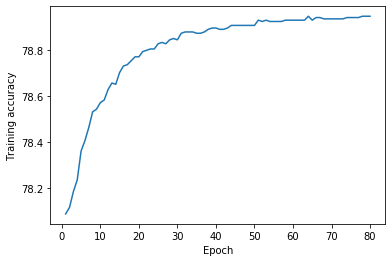

In [37]:
Epoch = np.arange(1,max_epoch+1)
data2 = pd.DataFrame(train_acc1, columns=['Epoch','Train accuracry', 'number of updates'])
print(data2.to_string(index = False))
train_acc1 = np.array(train_acc1)
plt.plot(train_acc1[:,0], train_acc1[:,1])
plt.xlabel('Epoch') 
plt.ylabel('Training accuracy')

In [38]:
report4 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best cross val. acc.(%)':best_acc, 
            'Best epoch':best_epoch, 'number of updates':train_acc1[best_epoch-1][2],
            'Train accuracy(%)':train_acc1[best_epoch-1][1], 
            'Test accuracy(%)':test_acc}]

report4 = pd.DataFrame.from_records(report4)
print(report4.to_string(index = False))

 Best learning rate  Best margin variable  Best cross val. acc.(%)  Best epoch  number of updates  Train accuracy(%)  Test accuracy(%)
                0.1                   1.0                78.469388          64           500966.0          78.948571         79.466667


In [40]:
pred4 = prediction (Eval_misc,  w4[best_epoch-1][:], b4[best_epoch-1])
pred4.to_csv ('results\Preceptron_result\misc_labels.csv', index = False, header=True)

## Margin perceptron with bow

In [164]:
# generating 5-fold dataset:
Data1 = Train_data_bow
cols = Data1.columns
Data1 = Data1.to_numpy()
np.random.shuffle(Data1)
Data1 = pd.DataFrame(Data1, columns=cols)
f1 = k_fold(Data1,1)
f2 = k_fold(Data1,2)
f3 = k_fold(Data1,3)
f4 = k_fold(Data1,4)
f5 = k_fold(Data1,5)

In [165]:
# Evaluating the network accuracy based on different values for learning rates and u:
"""
The cross validation function in previous section is run for different values of learning rates to find the best
hyper parameter
"""
Learning_rates = [1,0.1, 0.01, 0.001]
margin_variable = [1,0.1, 0.01]

max_epoch = 10
acc_mean = []
acc_std = []
result = []
for lr in Learning_rates:
    for u in margin_variable:
        mean, std = cross_val_ev(f1, f2, f3, f4, f5, max_epoch, lr, 'margin_perceptron', u)
        acc_mean.append(mean)
        acc_std.append(std)
        result.append([lr, u, mean, std])
        #print(lr, u)

result = np.array(result)
Best_lr = result[np.argmax(result[:,2]), 0]
Best_u = result[np.argmax(result[:,2]), 1]
best_acc = result[np.argmax(result[:,2]), 2]

print('Cross validation results for different Learning rates and margin variables:')
result = pd.DataFrame(result, columns=['Learning rate', 'Margin variable', 'accuracy mean', 'accuracy std'])

pd.set_option('display.max_rows', None)
print(result.to_string(index = False))
print('Best learning rate:', Best_lr)

print('Best margin variable:', Best_u)

report1 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best accuracy':best_acc}]
report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))


Cross validation results for different Learning rates and margin variables:
 Learning rate  Margin variable  accuracy mean  accuracy std
         1.000             1.00      68.724277      0.590174
         1.000             0.10      68.227017      0.461414
         1.000             0.01      68.529926      0.805691
         0.100             1.00      69.158649      0.590222
         0.100             0.10      68.604227      0.425621
         0.100             0.01      67.981239      0.337824
         0.010             1.00      70.639012      0.586539
         0.010             0.10      69.181511      0.795419
         0.010             0.01      68.232693      0.483388
         0.001             1.00      70.461843      0.727366
         0.001             0.10      70.330382      0.585036
         0.001             0.01      68.581392      0.224408
Best learning rate: 0.01
Best margin variable: 1.0
 Best learning rate  Best margin variable  Best accuracy
               0.01    

In [168]:
max_epoch = 80
w4, b4, ep_update4  = margin_perceptron(Train_data_bow, max_epoch, Best_lr, Best_u)
#print(b)
train_acc = []
train_acc1 =[]
acc = [ 0, 0, 0]
for i in range (max_epoch):
    #print(w[i][0])
    train_acc.append (accuracy (Train_data_bow, w4[i][:],b4[i]))
    acc[0] = i+1
    acc[1] = accuracy (Train_data_bow, w4[i][:],b4[i])
    acc[2] = ep_update4[i]
    train_acc1.append(acc.copy())
    
#print(train_acc)

train_acc = np.array(train_acc)

best_epoch = np.argmax(train_acc)+1


test_acc =  accuracy (Test_data_bow, w4[best_epoch-1][:],b4[best_epoch-1])


 Epoch  Train accuracry  number of updates
     1        73.754286               9814
     2        76.520000              18113
     3        78.251429              26146
     4        79.097143              34084
     5        80.017143              41855
     6        80.708571              49574
     7        81.245714              57227
     8        81.708571              64853
     9        82.074286              72467
    10        82.388571              79986
    11        82.668571              87452
    12        83.034286              94915
    13        83.257143             102378
    14        83.382857             109833
    15        83.634286             117187
    16        83.725714             124557
    17        83.862857             131931
    18        83.971429             139251
    19        84.068571             146537
    20        84.154286             153818
    21        84.274286             161077
    22        84.434286             168313
    23     

Text(0, 0.5, 'Training accuracy')

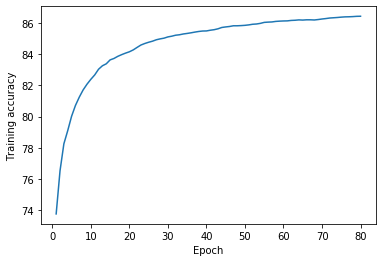

In [169]:
Epoch = np.arange(1,max_epoch+1)
data2 = pd.DataFrame(train_acc1, columns=['Epoch','Train accuracry', 'number of updates'])
print(data2.to_string(index = False))
train_acc1 = np.array(train_acc1)
plt.plot(train_acc1[:,0], train_acc1[:,1])
plt.xlabel('Epoch') 
plt.ylabel('Training accuracy')

In [170]:
report4 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best cross val. acc.(%)':best_acc, 
            'Best epoch':best_epoch, 'number of updates':train_acc1[best_epoch-1][2],
            'Train accuracy(%)':train_acc1[best_epoch-1][1], 
            'Test accuracy(%)':test_acc}]

report4 = pd.DataFrame.from_records(report4)
print(report4.to_string(index = False))

 Best learning rate  Best margin variable  Best cross val. acc.(%)  Best epoch  number of updates  Train accuracy(%)  Test accuracy(%)
               0.01                   1.0                70.639012          80           574583.0          86.434286         71.244444


In [176]:
pred4 = prediction (Eval_data_bow,  w4[best_epoch-1][:], b4[best_epoch-1])
pred4.to_csv ('bow_labels.csv', index = False, header=True)

## Margin perceptron with tfidf

In [19]:
# generating 5-fold dataset:
Data1 = Train_data_tfidf
cols = Data1.columns
Data1 = Data1.to_numpy()
np.random.shuffle(Data1)
Data1 = pd.DataFrame(Data1, columns=cols)
f1 = k_fold(Data1,1)
f2 = k_fold(Data1,2)
f3 = k_fold(Data1,3)
f4 = k_fold(Data1,4)
f5 = k_fold(Data1,5)

In [20]:
# Evaluating the network accuracy based on different values for learning rates and u:
"""
The cross validation function in previous section is run for different values of learning rates to find the best
hyper parameter
"""
Learning_rates = [1,0.1, 0.01, 0.001]
margin_variable = [1,0.1, 0.01]

max_epoch = 10
acc_mean = []
acc_std = []
result = []
for lr in Learning_rates:
    for u in margin_variable:
        mean, std = cross_val_ev(f1, f2, f3, f4, f5, max_epoch, lr, 'margin_perceptron', u)
        acc_mean.append(mean)
        acc_std.append(std)
        result.append([lr, u, mean, std])
        #print(lr, u)

result = np.array(result)
Best_lr = result[np.argmax(result[:,2]), 0]
Best_u = result[np.argmax(result[:,2]), 1]
best_acc = result[np.argmax(result[:,2]), 2]

print('Cross validation results for different Learning rates and margin variables:')
result = pd.DataFrame(result, columns=['Learning rate', 'Margin variable', 'accuracy mean', 'accuracy std'])

pd.set_option('display.max_rows', None)
print(result.to_string(index = False))
print('Best learning rate:', Best_lr)

print('Best margin variable:', Best_u)

report1 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best accuracy':best_acc}]
report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))


Cross validation results for different Learning rates and margin variables:
 Learning rate  Margin variable  accuracy mean  accuracy std
         1.000             1.00      71.284890      0.443860
         1.000             0.10      70.147487      0.374806
         1.000             0.01      69.936036      0.502691
         0.100             1.00      71.867907      0.636873
         0.100             0.10      71.599239      0.264732
         0.100             0.01      69.838847      0.371118
         0.010             1.00      67.844184      1.132475
         0.010             0.10      71.930798      0.784060
         0.010             0.01      70.953412      0.522366
         0.001             1.00      52.679993      5.426802
         0.001             0.10      68.044222      1.294163
         0.001             0.01      69.758850      0.635772
Best learning rate: 0.01
Best margin variable: 0.1
 Best learning rate  Best margin variable  Best accuracy
               0.01    

In [21]:
max_epoch = 80
w4, b4, ep_update4  = margin_perceptron(Train_data_tfidf, max_epoch, Best_lr, Best_u)
#print(b)
train_acc = []
train_acc1 =[]
acc = [ 0, 0, 0]
for i in range (max_epoch):
    #print(w[i][0])
    train_acc.append (accuracy (Train_data_tfidf, w4[i][:],b4[i]))
    acc[0] = i+1
    acc[1] = accuracy (Train_data_tfidf, w4[i][:],b4[i])
    acc[2] = ep_update4[i]
    train_acc1.append(acc.copy())
    
#print(train_acc)

train_acc = np.array(train_acc)

best_epoch = np.argmax(train_acc)+1


test_acc =  accuracy (Test_data_tfidf, w4[best_epoch-1][:],b4[best_epoch-1])


 Epoch  Train accuracry  number of updates
     1        73.485714              14450
     2        75.222857              26805
     3        76.034286              38674
     4        76.611429              50224
     5        77.062857              61554
     6        77.554286              72823
     7        77.937143              83974
     8        78.182857              94996
     9        78.371429             105986
    10        78.451429             116906
    11        78.657143             127773
    12        78.714286             138604
    13        78.828571             149383
    14        78.982857             160107
    15        79.091429             170779
    16        79.160000             181418
    17        79.274286             192057
    18        79.365714             202657
    19        79.457143             213214
    20        79.502857             223767
    21        79.582857             234291
    22        79.662857             244789
    23     

Text(0, 0.5, 'Training accuracy')

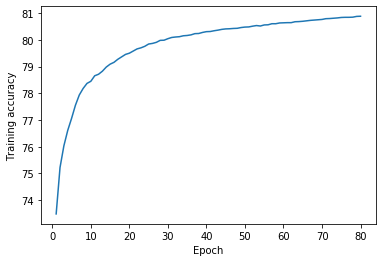

In [22]:
Epoch = np.arange(1,max_epoch+1)
data2 = pd.DataFrame(train_acc1, columns=['Epoch','Train accuracry', 'number of updates'])
print(data2.to_string(index = False))
train_acc1 = np.array(train_acc1)
plt.plot(train_acc1[:,0], train_acc1[:,1])
plt.xlabel('Epoch') 
plt.ylabel('Training accuracy')

In [23]:
report4 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best cross val. acc.(%)':best_acc, 
            'Best epoch':best_epoch, 'number of updates':train_acc1[best_epoch-1][2],
            'Train accuracy(%)':train_acc1[best_epoch-1][1], 
            'Test accuracy(%)':test_acc}]

report4 = pd.DataFrame.from_records(report4)
print(report4.to_string(index = False))

 Best learning rate  Best margin variable  Best cross val. acc.(%)  Best epoch  number of updates  Train accuracy(%)  Test accuracy(%)
               0.01                   0.1                71.930798          80           834932.0          80.885714         72.844444


In [26]:
pred4 = prediction (Eval_data_tfidf,  w4[best_epoch-1][:], b4[best_epoch-1])
pred4.to_csv ('tfidf_labels.csv', index = False, header=True)

## Margin perceptron with miscalleneous+tfidf:

In [16]:
Train_data = concat_datasets(Train_misc, Train_data_tfidf)
Test_data = concat_datasets(Test_misc, Test_data_tfidf)
Eval_data = concat_datasets(Eval_misc, Eval_data_tfidf)

In [17]:
# generating 5-fold dataset:
Data1 = Train_data
cols = Data1.columns
Data1 = Data1.to_numpy()
np.random.shuffle(Data1)
Data1 = pd.DataFrame(Data1, columns=cols)
f1_misc = k_fold(Data1,1)
f2_misc = k_fold(Data1,2)
f3_misc = k_fold(Data1,3)
f4_misc = k_fold(Data1,4)
f5_misc = k_fold(Data1,5)

In [18]:
# Evaluating the network accuracy based on different values for learning rates and u:
"""
The cross validation function in previous section is run for different values of learning rates to find the best
hyper parameter
"""
Learning_rates = [1,0.1, 0.01, 0.001]
margin_variable = [1,0.5, 0.1]

max_epoch = 10
acc_mean = []
acc_std = []
result = []
for lr in Learning_rates:
    for u in margin_variable:
        mean, std = cross_val_ev(f1_misc, f2_misc, f3_misc, f4_misc, f5_misc, max_epoch, lr, 'margin_perceptron', u)
        acc_mean.append(mean)
        acc_std.append(std)
        result.append([lr, u, mean, std])
        #print(lr, u)

result = np.array(result)
Best_lr = result[np.argmax(result[:,2]), 0]
Best_u = result[np.argmax(result[:,2]), 1]
best_acc = result[np.argmax(result[:,2]), 2]

print('Cross validation results for different Learning rates and margin variables:')
result = pd.DataFrame(result, columns=['Learning rate', 'Margin variable', 'accuracy mean', 'accuracy std'])

pd.set_option('display.max_rows', None)
print(result.to_string(index = False))
print('Best learning rate:', Best_lr)

print('Best margin variable:', Best_u)

report1 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best accuracy':best_acc}]
report1 = pd.DataFrame.from_records(report1)
print(report1.to_string(index = False))


Cross validation results for different Learning rates and margin variables:
 Learning rate  Margin variable  accuracy mean  accuracy std
         1.000              1.0      79.743953      0.376533
         1.000              0.5      79.195274      0.538384
         1.000              0.1      78.892333      0.590322
         0.100              1.0      80.921352      0.657139
         0.100              0.5      80.978528      0.655068
         0.100              0.1      79.789682      0.570851
         0.010              1.0      78.263636      0.748778
         0.010              0.5      78.640866      0.841444
         0.010              0.1      80.864196      0.594491
         0.001              1.0      77.989288      0.695541
         0.001              0.5      78.040728      0.735774
         0.001              0.1      78.303649      0.784628
Best learning rate: 0.1
Best margin variable: 0.5
 Best learning rate  Best margin variable  Best accuracy
                0.1     

In [19]:
max_epoch = 100
w4, b4, ep_update4  = margin_perceptron(Train_data, max_epoch, Best_lr, Best_u)
#print(b)
train_acc = []
train_acc1 =[]
acc = [ 0, 0, 0]
for i in range (max_epoch):
    #print(w[i][0])
    train_acc.append (accuracy (Train_data, w4[i][:],b4[i]))
    acc[0] = i+1
    acc[1] = accuracy (Train_data, w4[i][:],b4[i])
    acc[2] = ep_update4[i]
    train_acc1.append(acc.copy())
    
#print(train_acc)

train_acc = np.array(train_acc)

best_epoch = np.argmax(train_acc)+1


test_acc =  accuracy (Test_data, w4[best_epoch-1][:],b4[best_epoch-1])


 Epoch  Train accuracry  number of updates
     1        79.634286               6662
     2        81.240000              13047
     3        81.851429              19153
     4        82.354286              25161
     5        82.857143              31044
     6        83.274286              36877
     7        83.451429              42566
     8        83.628571              48269
     9        83.720000              53951
    10        83.885714              59543
    11        84.028571              65185
    12        84.102857              70743
    13        84.194286              76290
    14        84.245714              81831
    15        84.354286              87378
    16        84.400000              92893
    17        84.520000              98424
    18        84.588571             103913
    19        84.674286             109402
    20        84.714286             114915
    21        84.760000             120366
    22        84.811429             125819
    23     

Text(0, 0.5, 'Training accuracy')

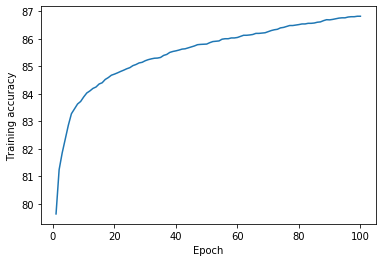

In [20]:
Epoch = np.arange(1,max_epoch+1)
data2 = pd.DataFrame(train_acc1, columns=['Epoch','Train accuracry', 'number of updates'])
print(data2.to_string(index = False))
train_acc1 = np.array(train_acc1)
plt.plot(train_acc1[:,0], train_acc1[:,1])
plt.xlabel('Epoch') 
plt.ylabel('Training accuracy')

In [21]:
report4 = [{'Best learning rate':Best_lr, 'Best margin variable':Best_u, 'Best cross val. acc.(%)':best_acc, 
            'Best epoch':best_epoch, 'number of updates':train_acc1[best_epoch-1][2],
            'Train accuracy(%)':train_acc1[best_epoch-1][1], 
            'Test accuracy(%)':test_acc}]

report4 = pd.DataFrame.from_records(report4)
print(report4.to_string(index = False))

 Best learning rate  Best margin variable  Best cross val. acc.(%)  Best epoch  number of updates  Train accuracy(%)  Test accuracy(%)
                0.1                   0.5                80.978528          99           541186.0          86.817143         82.355556


In [22]:
pred4 = prediction (Eval_data,  w4[best_epoch-1][:], b4[best_epoch-1])
pred4.to_csv ('misc_tfidf_labels.csv', index = False, header=True)